<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Brain Tumor Detection CV Project (YOLO9) > Classes (5)</p></b></h1
    
### Table of contents:

* [Dowenloading Dataset](#1)
* [IMPORTING LIBRARIES](#2)
* [Loading Model YOLOV9](#3)
* [Training Model in Custom Dataset](#4)
* [Evaluation](#5)
* [Show Results](#6)
* [Test Model](#7)
* [Like this? Upvote and comment! 🌊 End](#8)
    

<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Dowenloading Dataset</p></b></h1>

In [1]:
!pip install roboflow
!pip install ultralytics
from roboflow import Roboflow
rf = Roboflow(api_key="EJVfU57oVVqyNxwLK3Tx")
project = rf.workspace("brain-tumor-detection-wsera").project("tumor-detection-ko5jp")
version = project.version(8)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 27.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-8 in yolov9:: 100%|██████████| 3924/3924 [00:00<00:00, 7767.59it/s]


<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">IMPORTING LIBRARIES</p></b></h1>

In [2]:
import os
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import wandb
wandb.init(mode="disabled")

<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Loading Model YOLOV9</p></b></h1>

In [3]:
model = YOLO('yolov9s.pt')

100%|██████████| 14.7M/14.7M [00:00<00:00, 107MB/s] 


<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Training Model in Custom Dataset</p></b></h1>

In [4]:
# Train the model using your dataset
results = model.train(
    data='/kaggle/input/datset/data.yaml',  # Path to the dataset configuration file
    epochs=100,         # Number of training epochs
    imgsz=640,         # Image size for training
    batch=16,          # Batch size
    workers=8          # Number of data loading workers
)

Ultralytics YOLOv8.2.91 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/kaggle/input/datset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 40.6MB/s]
2024-09-09 23:15:40,934	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-09 23:15:41,445	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 191MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Tumor-Detection-8/train/labels... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:01<00:00, 1137.88it/s]

train: WARNING ⚠️ /kaggle/working/Tumor-Detection-8/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed


train: New cache created: /kaggle/working/Tumor-Detection-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Tumor-Detection-8/valid/labels... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<00:00, 871.17it/s]

val: New cache created: /kaggle/working/Tumor-Detection-8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.92G     0.9164      2.397      1.315         16        640: 100%|██████████| 86/86 [00:42<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]


                   all        395        415      0.562      0.442      0.381      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.81G     0.9705      1.383      1.338         22        640: 100%|██████████| 86/86 [00:38<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        395        415      0.697      0.442      0.451      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.82G     0.9953      1.248      1.367         23        640: 100%|██████████| 86/86 [00:38<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]

                   all        395        415      0.884      0.288      0.429      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.81G     0.9769      1.155      1.347         29        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.55it/s]

                   all        395        415      0.857      0.343      0.433      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.81G     0.9881      1.094      1.365         23        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]

                   all        395        415      0.716      0.479      0.513      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.81G     0.9633      1.066      1.355         14        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]

                   all        395        415      0.768      0.461      0.522      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.81G     0.9001       1.01       1.31         23        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]

                   all        395        415      0.847      0.499      0.584      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.81G     0.9251     0.9622      1.323         15        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]

                   all        395        415      0.825       0.52      0.623      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.81G     0.8895     0.8892      1.295         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]

                   all        395        415      0.867      0.536      0.604      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.81G     0.8709      0.849      1.297         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415      0.782      0.567      0.606      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.81G     0.8861      0.854      1.303         24        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.868      0.538      0.609      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.81G     0.8459     0.8292      1.273         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]

                   all        395        415      0.843      0.531      0.591      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.81G     0.8573     0.8488      1.293         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.725      0.536      0.566      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.81G      0.834     0.8222      1.256         17        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415      0.816       0.55      0.628      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.81G     0.8201     0.7947       1.25         25        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.60it/s]

                   all        395        415      0.779      0.568      0.609       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.81G     0.8091     0.7662      1.246         17        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        395        415      0.796      0.597      0.631      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.81G     0.8072     0.7339      1.252         23        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.872      0.576      0.638      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.81G     0.7548     0.7282      1.206         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.863      0.544      0.622      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.81G     0.7947     0.7333      1.246         24        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        395        415      0.833      0.538      0.601      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.82G     0.7869     0.7369      1.225         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]

                   all        395        415      0.831      0.602      0.621      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.81G     0.7683      0.671      1.223         10        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415       0.65       0.58       0.63      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.82G     0.7749     0.7124      1.239         14        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]

                   all        395        415       0.62      0.694       0.65       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.81G     0.7383     0.6985      1.207         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415      0.849      0.626       0.67      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.82G     0.7451     0.6627      1.221         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.812      0.645      0.648      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.81G     0.7407     0.6726      1.197         24        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.857      0.598      0.652      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.81G     0.7027     0.6631      1.176         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]

                   all        395        415      0.778      0.601       0.62        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.81G     0.7243     0.6368      1.193         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.59it/s]

                   all        395        415      0.812      0.573      0.625        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.81G     0.7355     0.6526      1.189         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.55it/s]

                   all        395        415      0.797      0.631      0.645      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.81G     0.7162     0.6356      1.194         20        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415       0.83       0.63      0.698      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.81G     0.7178     0.6124      1.188         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.67it/s]

                   all        395        415      0.664       0.62      0.659       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.81G     0.6981     0.5972      1.174         20        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.881      0.595      0.656      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.82G     0.6815     0.5841      1.163         20        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.857      0.628      0.664      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.81G     0.6638     0.5819      1.151         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.904      0.599      0.665      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.81G     0.6762     0.5851      1.163         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415       0.64      0.613      0.649      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.81G     0.6761     0.5943       1.16         11        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.883      0.611      0.664      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.82G     0.6712     0.5774       1.16         20        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.52it/s]

                   all        395        415        0.9      0.608      0.669      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.81G     0.6777     0.5722      1.173         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        395        415      0.694      0.622      0.662      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.82G     0.6542     0.5567      1.145         21        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]

                   all        395        415       0.92      0.606      0.673      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.81G     0.6641     0.5569      1.162         24        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]

                   all        395        415      0.642      0.574      0.584      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.81G     0.6406     0.5668      1.148         20        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.845      0.634      0.668      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.81G     0.6566     0.5492      1.154         21        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        395        415      0.841      0.604      0.647      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.82G     0.6374     0.5426       1.14         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]

                   all        395        415      0.658      0.607      0.653      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.81G     0.6244     0.5109      1.131         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.647      0.619      0.643      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.81G     0.6484     0.5264      1.153         15        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415      0.648       0.63      0.665      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.81G     0.6013     0.5093      1.117         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.709      0.586      0.665      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.81G     0.6516      0.539       1.15         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.872      0.649       0.68      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.81G     0.6101     0.4993      1.125         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.60it/s]

                   all        395        415      0.888       0.62      0.668      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.81G      0.636     0.5081      1.148         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.683      0.624       0.68      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.81G     0.6139     0.4889      1.125         26        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.854      0.636      0.659      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.81G     0.6054     0.5063       1.13         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.67it/s]

                   all        395        415      0.929      0.624      0.696      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.81G     0.5943     0.4903      1.114         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        395        415      0.636      0.616      0.639      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.81G     0.5921     0.4801      1.118         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.649      0.653      0.681      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.81G      0.599     0.4834      1.113         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415      0.875      0.625      0.668      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.81G      0.604     0.4728       1.13         18        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.649      0.626      0.664      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.81G     0.5761     0.4628      1.112         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.55it/s]

                   all        395        415      0.854      0.631      0.663      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.82G     0.5761     0.4725      1.092         15        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.684      0.649      0.688      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.81G     0.5548     0.4482      1.093         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.705       0.63      0.683       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.81G     0.5659     0.4409      1.092         17        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        395        415       0.69      0.637       0.68      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.81G     0.5564     0.4354      1.087         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]

                   all        395        415      0.644      0.641      0.669       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.82G     0.5684     0.4502      1.104         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.699       0.63      0.683       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.81G     0.5589     0.4293      1.098         17        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.884      0.638      0.683      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.81G     0.5576     0.4424      1.096         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        395        415      0.665      0.635      0.684      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.81G     0.5587     0.4269      1.084         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]

                   all        395        415      0.708      0.621      0.673       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.81G      0.551       0.42      1.084         14        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]

                   all        395        415      0.894      0.637      0.678      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.81G     0.5228      0.418      1.062         18        640: 100%|██████████| 86/86 [00:38<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.912      0.617      0.674      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.81G      0.542     0.4246      1.081         17        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.876      0.637      0.669      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.81G      0.543     0.4287      1.088         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415      0.879      0.639      0.672      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.81G     0.5096     0.3972      1.059         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.895      0.614      0.663      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.81G     0.5321     0.4072      1.081         29        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]

                   all        395        415      0.683      0.629      0.675       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.81G     0.5147     0.4097       1.06         17        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.878      0.631      0.672      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.81G     0.5182     0.4059      1.078         24        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]

                   all        395        415      0.854      0.631      0.662      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.81G     0.5067     0.3887      1.065         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415       0.65      0.625      0.654      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.81G     0.5167     0.3805      1.064         20        640: 100%|██████████| 86/86 [00:38<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]

                   all        395        415      0.886      0.634      0.659      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.81G     0.5118     0.3825      1.057         29        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]

                   all        395        415      0.888      0.635       0.67      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.81G     0.4854     0.3707      1.035         17        640: 100%|██████████| 86/86 [00:38<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.60it/s]

                   all        395        415      0.893      0.628       0.67      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.81G     0.4929     0.3685       1.04         26        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415      0.692      0.619      0.667      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.81G     0.4772     0.3621       1.05         21        640: 100%|██████████| 86/86 [00:37<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]

                   all        395        415      0.911      0.602      0.663      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.82G     0.4865     0.3648      1.042         21        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.916       0.63      0.677      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.81G     0.4809     0.3519      1.048         16        640: 100%|██████████| 86/86 [00:37<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]

                   all        395        415      0.688      0.621      0.673      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.81G     0.5021      0.375      1.064         21        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.874      0.638      0.676      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.81G     0.4736     0.3648      1.044         21        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.60it/s]

                   all        395        415      0.686      0.642      0.666      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.81G     0.4783     0.3664      1.034         23        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.697      0.636      0.676      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.81G     0.4752     0.3399      1.043         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.905      0.629      0.672       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.81G     0.4776     0.3512      1.042         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]

                   all        395        415      0.889      0.636      0.671      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.81G     0.4869      0.351      1.046         17        640: 100%|██████████| 86/86 [00:37<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.666      0.658      0.669      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.81G      0.451     0.3269      1.018         17        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.892      0.626      0.671      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.81G     0.4569     0.3211      1.034         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]

                   all        395        415      0.904       0.63      0.668      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.81G     0.4658     0.3372      1.034         21        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.886      0.633      0.672      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.81G     0.4489     0.3366       1.03         22        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.884      0.628      0.669      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.81G     0.4481      0.328      1.022         19        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.896      0.628      0.667      0.562


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.81G     0.3592     0.2693     0.9685         10        640: 100%|██████████| 86/86 [00:38<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.878      0.625      0.657      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.81G     0.3448     0.2313     0.9468         12        640: 100%|██████████| 86/86 [00:37<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.59it/s]

                   all        395        415      0.878      0.631      0.666      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.81G     0.3376     0.2256     0.9338         11        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]

                   all        395        415      0.872      0.638      0.673      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.81G     0.3371     0.2187     0.9423         11        640: 100%|██████████| 86/86 [00:37<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        395        415      0.885      0.633      0.677      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.82G     0.3184     0.2151      0.927         14        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        395        415      0.905      0.628      0.675      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.81G     0.3309     0.2152     0.9481         10        640: 100%|██████████| 86/86 [00:37<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.67it/s]

                   all        395        415        0.9      0.637      0.673      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.81G      0.324     0.2057     0.9388         10        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        395        415      0.896       0.64      0.674      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.81G     0.3258     0.2091      0.931         10        640: 100%|██████████| 86/86 [00:37<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.67it/s]

                   all        395        415      0.911      0.622       0.67       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.82G     0.3175     0.2054     0.9294         10        640: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        395        415      0.904      0.623      0.669      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.81G     0.3094     0.2021     0.9265         12        640: 100%|██████████| 86/86 [00:37<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]

                   all        395        415      0.904      0.624      0.667      0.558



100 epochs completed in 1.226 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 15.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.91 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9s summary (fused): 486 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.53it/s]


                   all        395        415      0.929      0.624      0.696      0.568
              NO_tumor        115        116      0.937      0.983      0.983      0.828
                glioma         30         36       0.91      0.561      0.713      0.518
            meningioma        144        148      0.942      0.874      0.945      0.824
             pituitary        106        111      0.854      0.703      0.804      0.637
space-occupying lesion-          1          4          1          0     0.0379     0.0314
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Evaluation</p></b></h1>

In [5]:
evaluation = model.val(data='/kaggle/input/datset/data.yaml')

Ultralytics YOLOv8.2.91 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9s summary (fused): 486 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs


val: Scanning /kaggle/working/Tumor-Detection-8/valid/labels.cache... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.43it/s]


                   all        395        415      0.929      0.625      0.696      0.567
              NO_tumor        115        116      0.937      0.983      0.983      0.828
                glioma         30         36       0.91      0.561      0.712       0.52
            meningioma        144        148      0.942      0.875      0.945      0.825
             pituitary        106        111      0.858      0.706      0.804      0.632
space-occupying lesion-          1          4          1          0     0.0379     0.0314
Speed: 0.2ms preprocess, 7.0ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train2


## <h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Show Results</p></b></h1>

In [6]:
def Show_Result(image_path):
    img = mpimg.imread(image_path)
    plt.style.use('dark_background')
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [7]:
pd.read_csv('/kaggle/working/runs/detect/train/results.csv')

epoch        train/box_loss        train/cls_loss  \
0                      1               0.91639               2.39700   
1                      2               0.97046               1.38350   
2                      3               0.99533               1.24840   
3                      4               0.97689               1.15510   
4                      5               0.98810               1.09370   
..                   ...                   ...                   ...   
95                    96               0.33095               0.21524   
96                    97               0.32400               0.20572   
97                    98               0.32578               0.20911   
98                    99               0.31749               0.20540   
99                   100               0.30944               0.20207   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.31550               0.56212               0.44164   
1                1.33820               0.69718               0.44167   
2                1.36670               0.88427               0.28844   
3                1.34680               0.85716               0.34259   
4                1.36530               0.71624               0.47870   
..                   ...                   ...                   ...   
95               0.94812               0.89951               0.63710   
96               0.93884               0.89568               0.64023   
97               0.93096               0.91134               0.62173   
98               0.92941               0.90419               0.62304   
99               0.92654               0.90432               0.62354   

        metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0                0.38105               0.27484               0.93619   
1                0.45093               0.32256               0.93822   
2                0.42942               0.31078               0.94750   
3                0.43309               0.31166               1.00710   
4                0.51297               0.37861               0.93444   
..                   ...                   ...                   ...   
95               0.67297               0.56460               0.64446   
96               0.67447               0.55868               0.65146   
97               0.66968               0.55959               0.64542   
98               0.66865               0.55771               0.64407   
99               0.66717               0.55788               0.64171   

            val/cls_loss          val/dfl_loss                lr/pg0  \
0                1.93240                1.3507              0.000366   
1                3.61280                1.4909              0.000729   
2                2.44870                1.5283              0.001085   
3                2.08170                1.5400              0.001078   
4                1.38060                1.4608              0.001067   
..                   ...                   ...                   ...   
95               0.62095                1.3377              0.000066   
96               0.62235                1.3600              0.000055   
97               0.61740                1.3531              0.000044   
98               0.62160                1.3463              0.000033   
99               0.62900                1.3411              0.000022   

                  lr/pg1                lr/pg2  
0               0.000366              0.000366  
1               0.000729              0.000729  
2               0.001085              0.001085  
3               0.001078              0.001078  
4               0.001067              0.001067  
..                   ...                   ...  
95              0.000066              0.000066  
96              0.000055              0.000055  
97              0.000044              0.000044  
98              0.000033              0.000033  
99              0.00

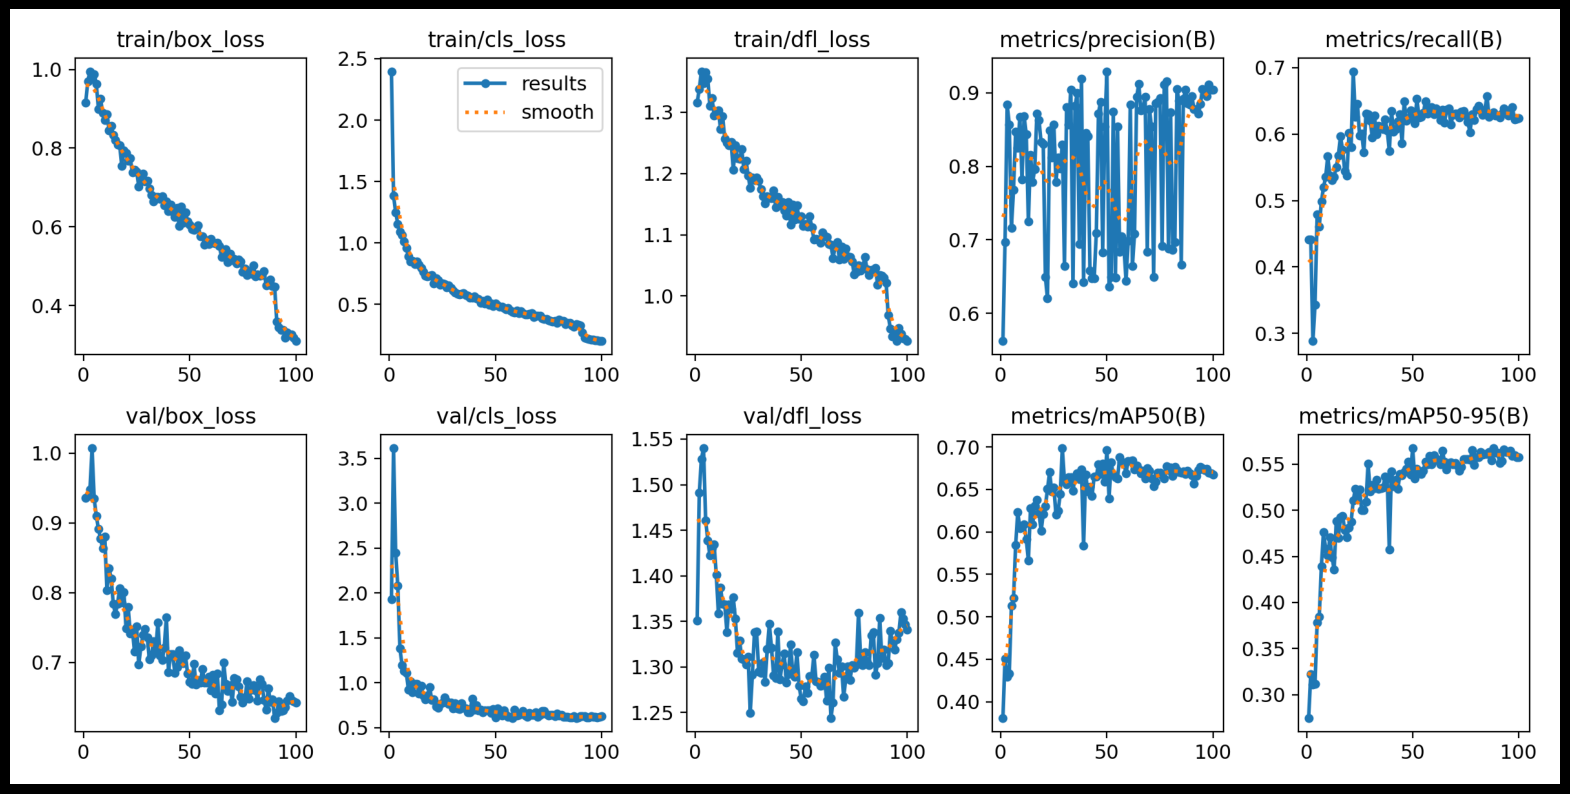

In [8]:
### Results
Show_Result('/kaggle/working/runs/detect/train/results.png')

In [9]:
path = os.path.join('/kaggle/working/runs/detect',os.listdir('/kaggle/working/runs/detect')[-1])
path

'/kaggle/working/runs/detect/train2'

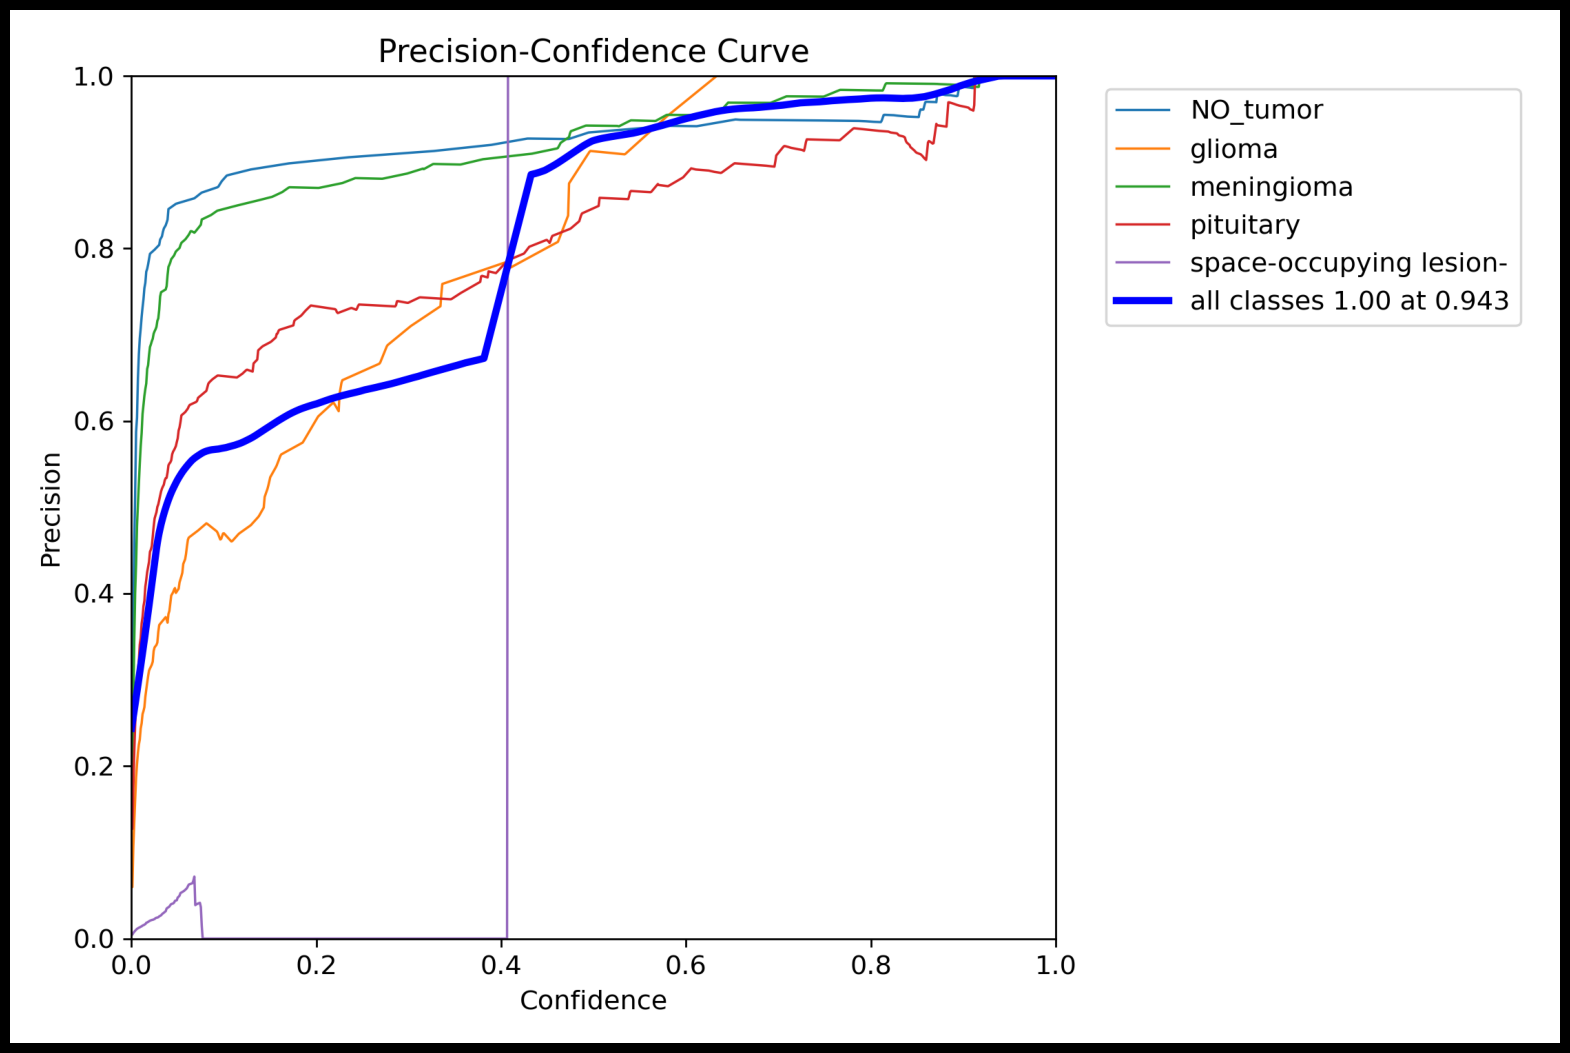

In [10]:
## Precision
Show_Result(os.path.join(path,'P_curve.png'))

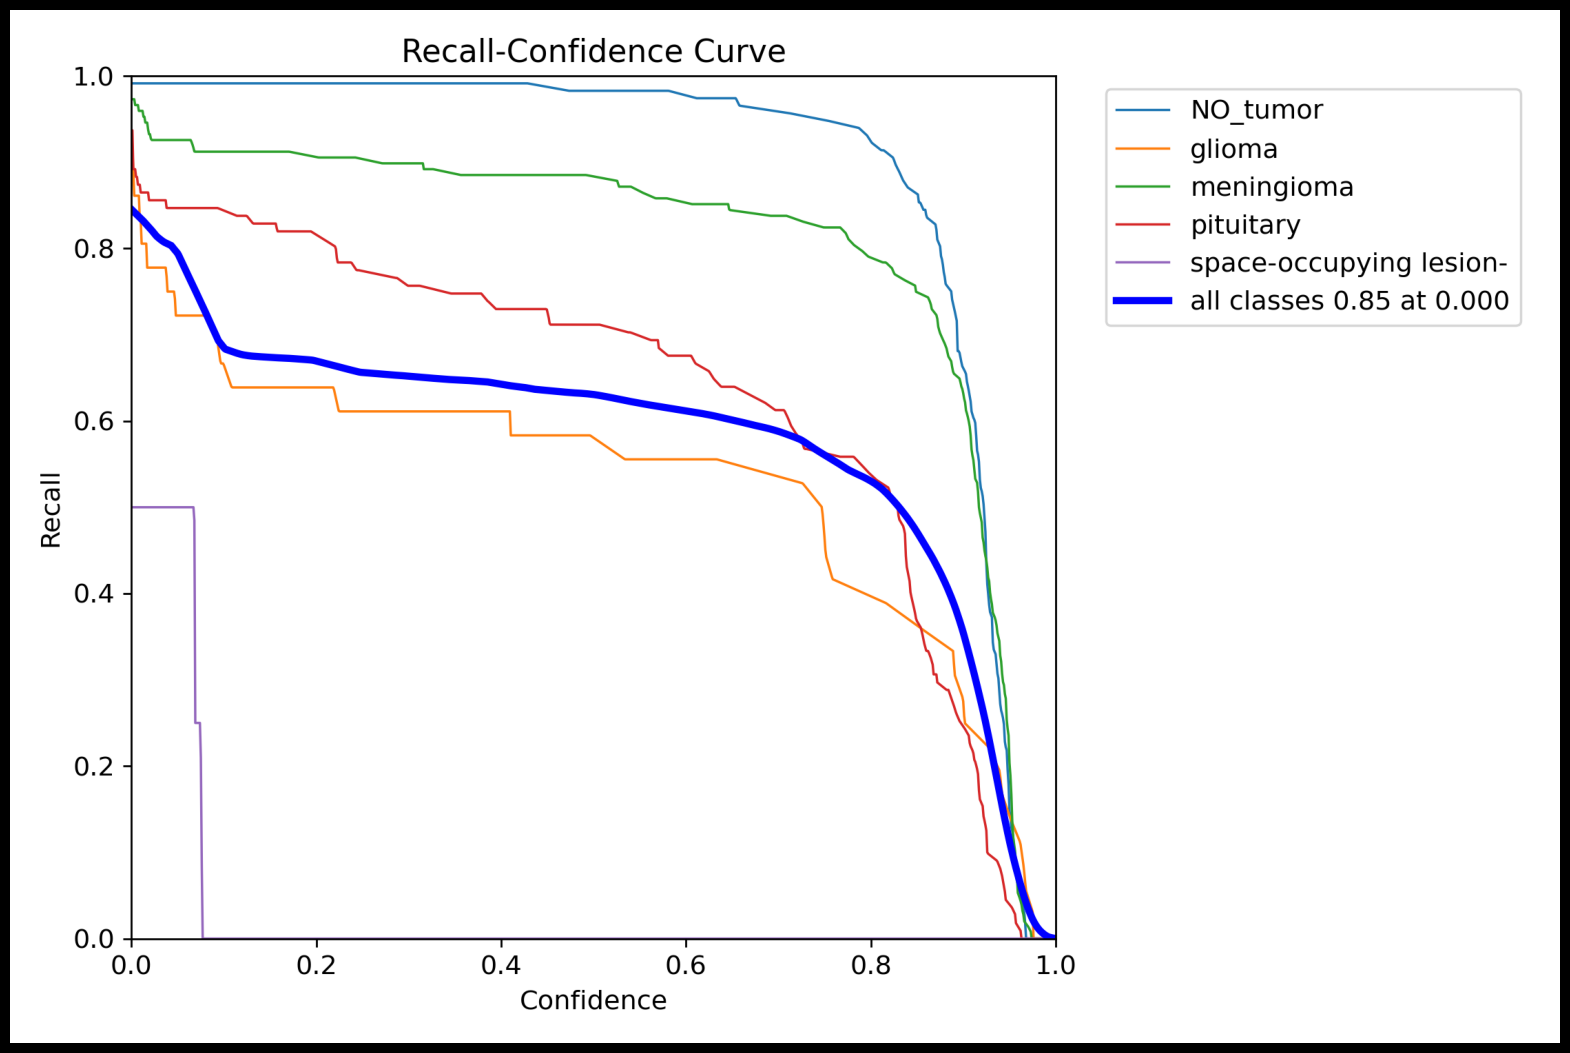

In [11]:
## Recall
Show_Result(os.path.join(path,'R_curve.png'))

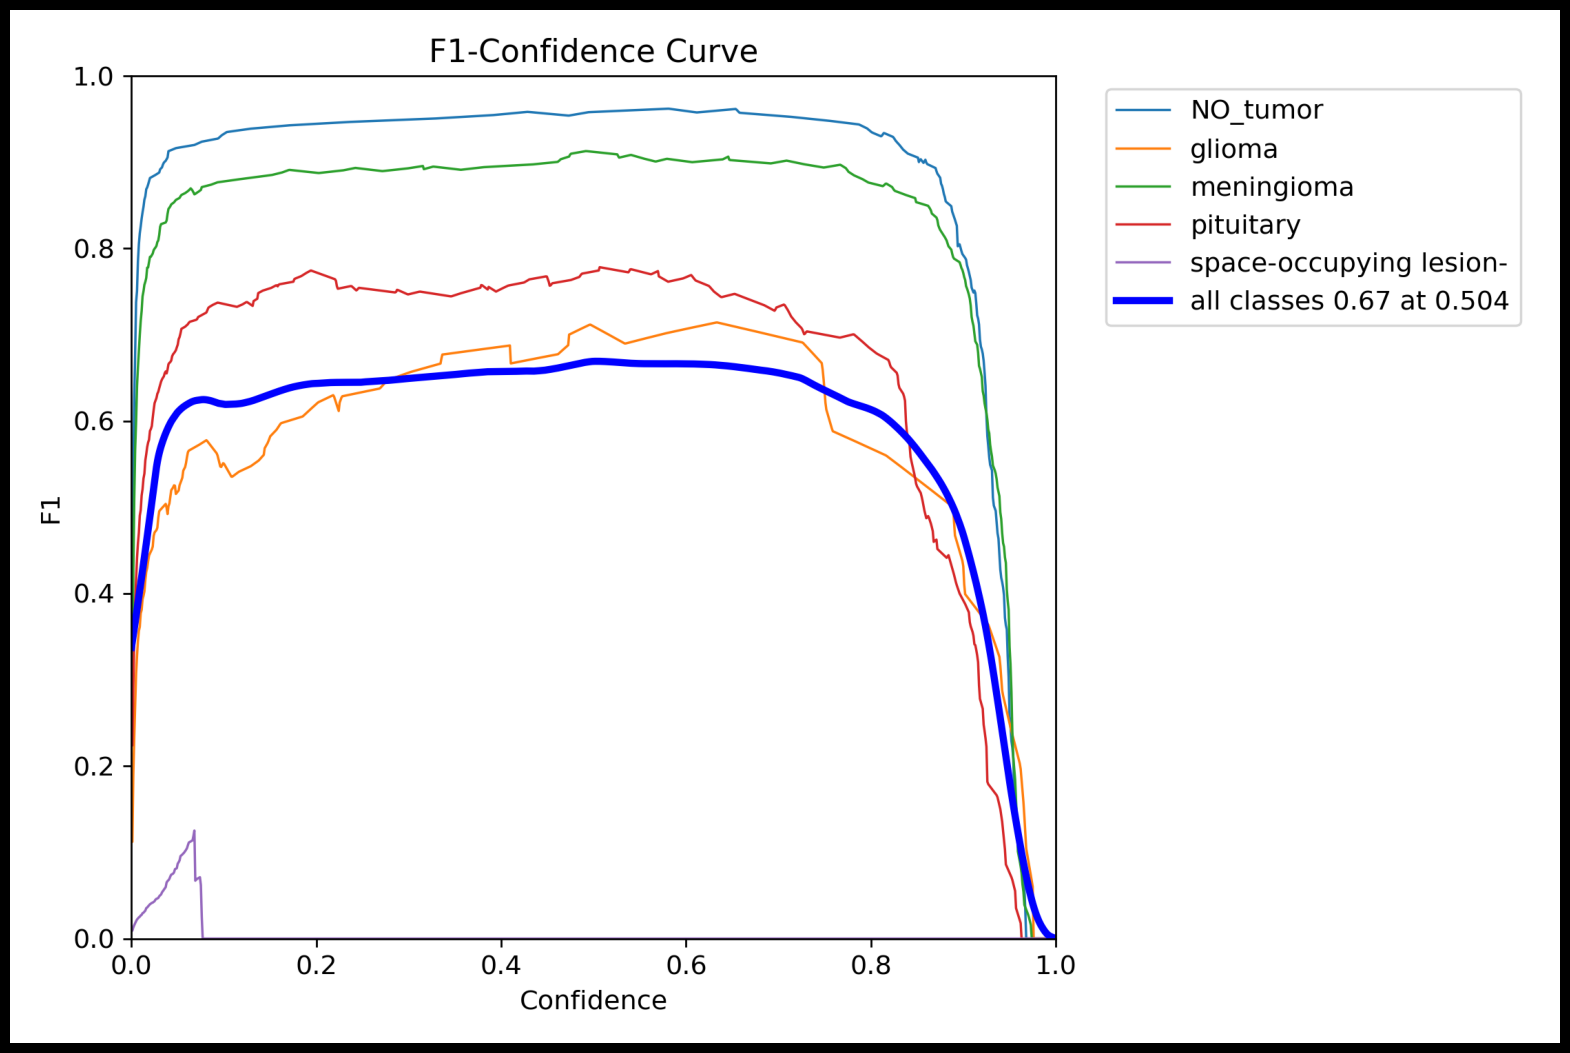

In [12]:
## F1
Show_Result(os.path.join(path,'F1_curve.png'))

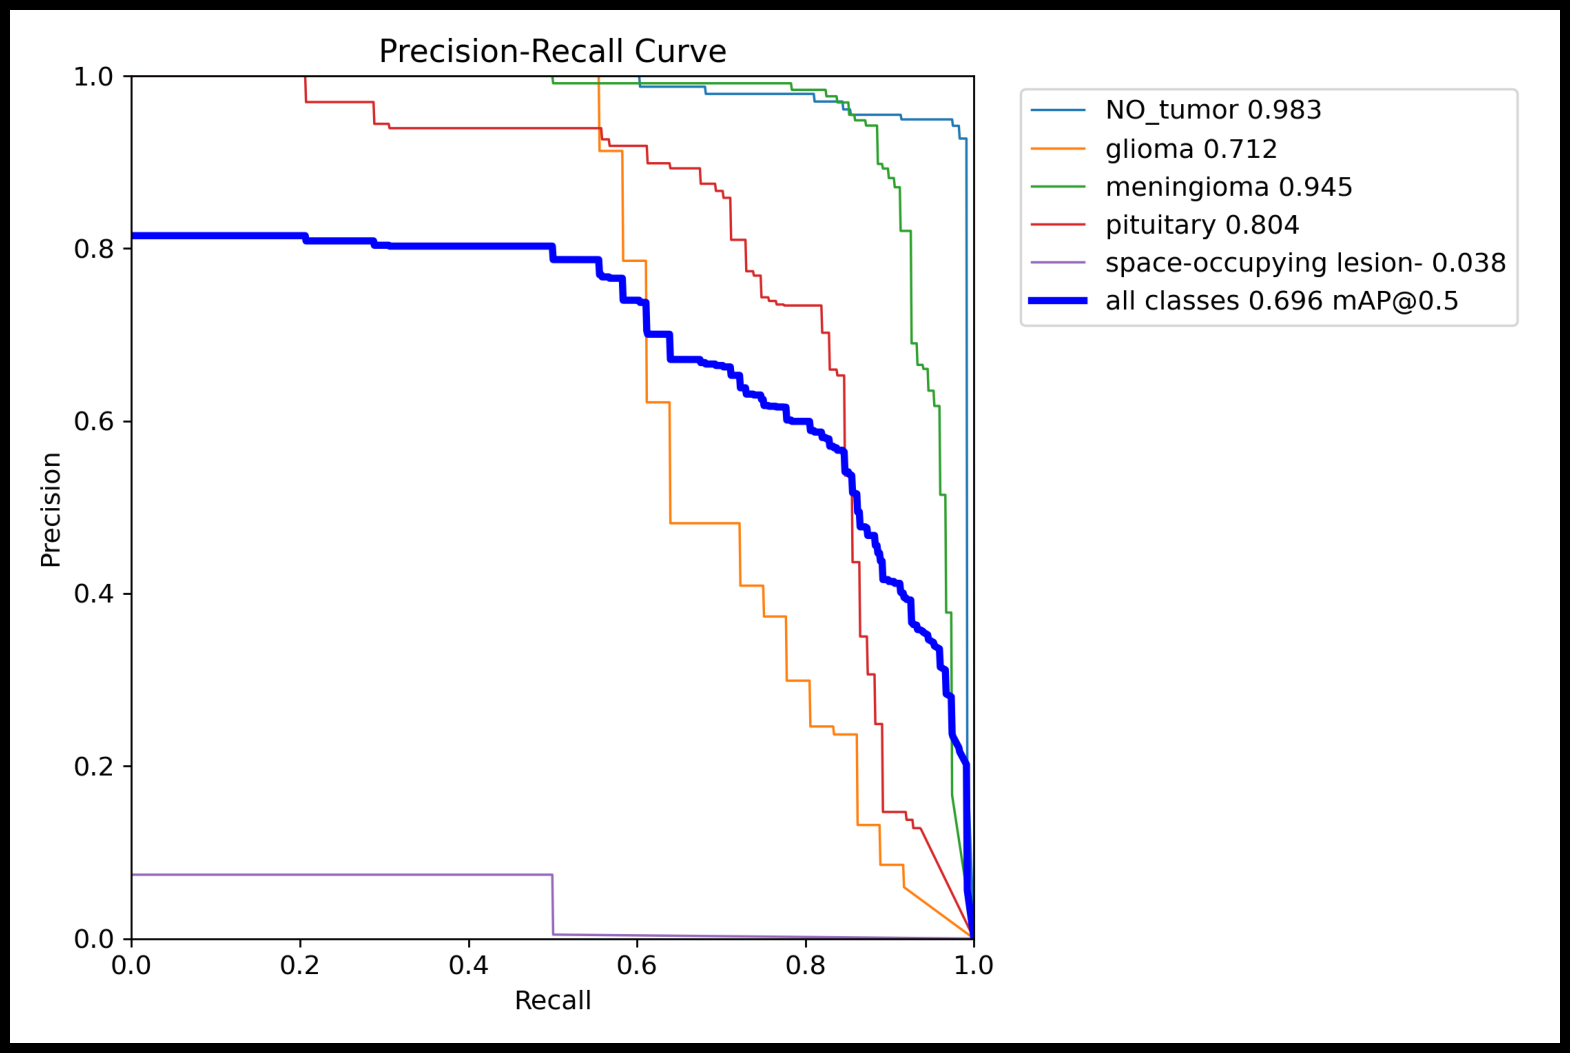

In [13]:
## Precision-Recall
Show_Result(os.path.join(path,'PR_curve.png'))

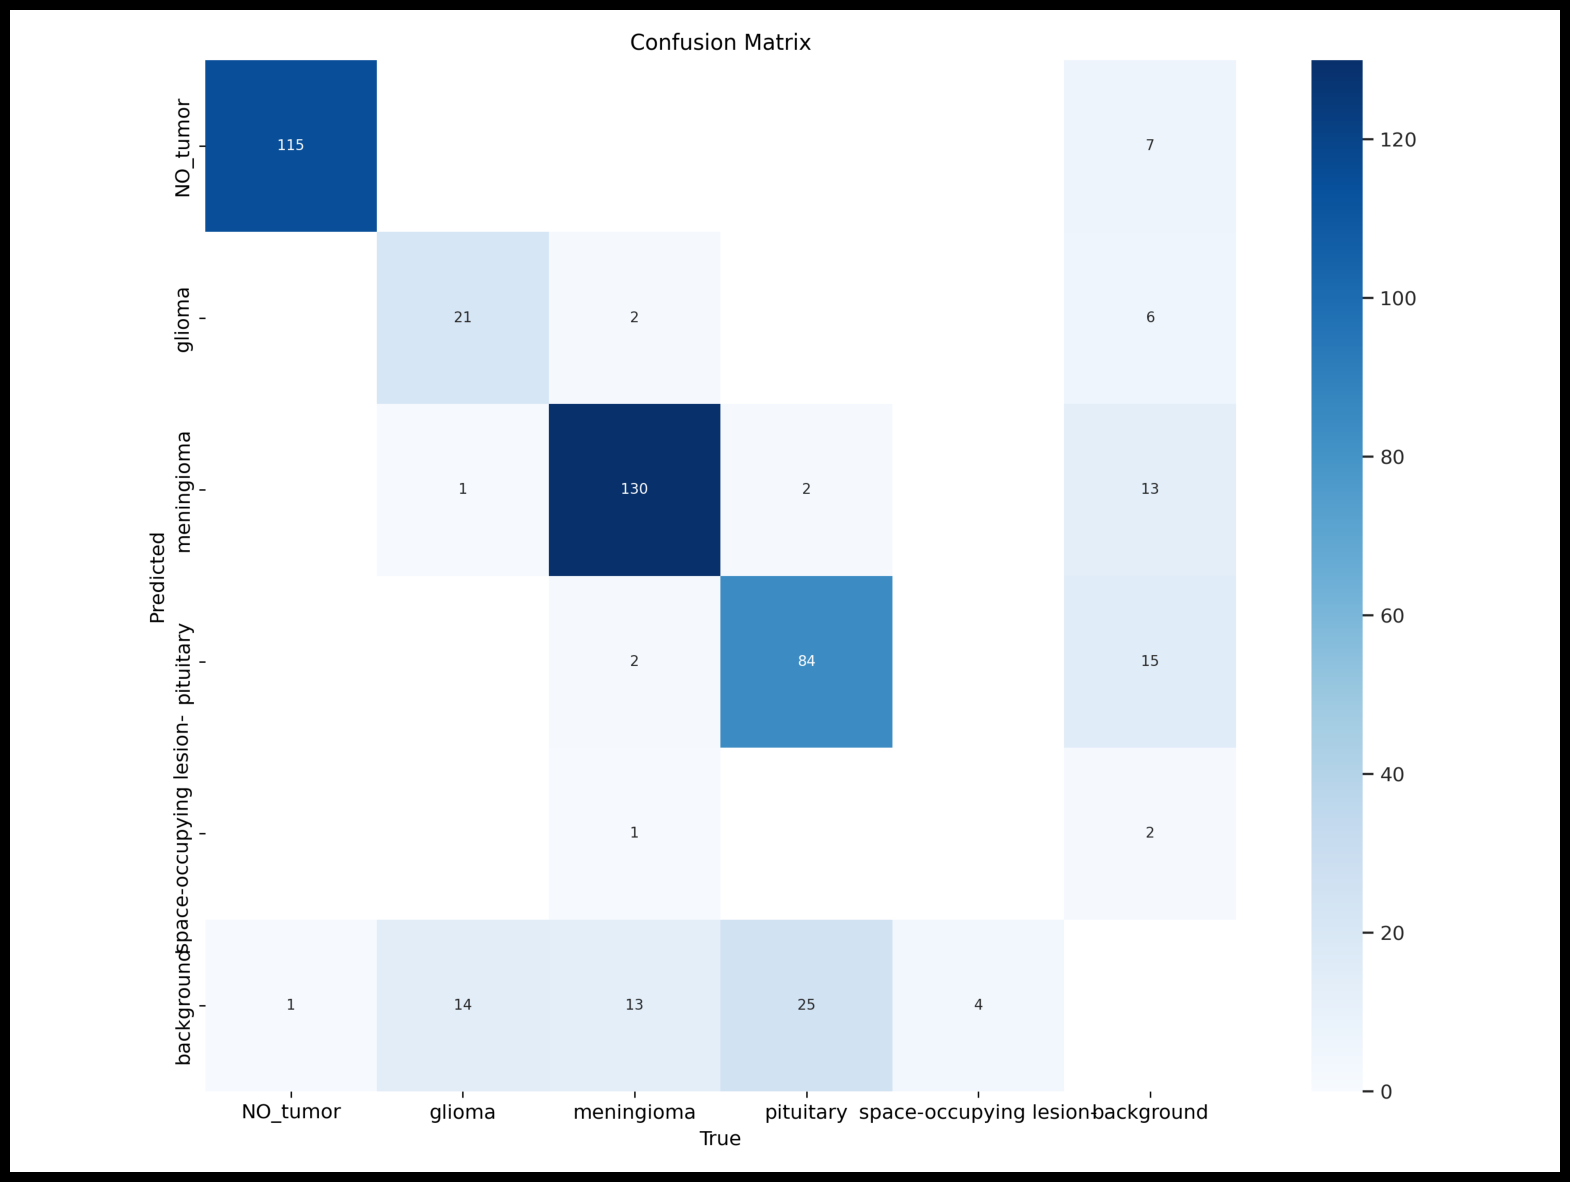

In [14]:
## Confusion Matrix
Show_Result(os.path.join(path,'confusion_matrix.png'))

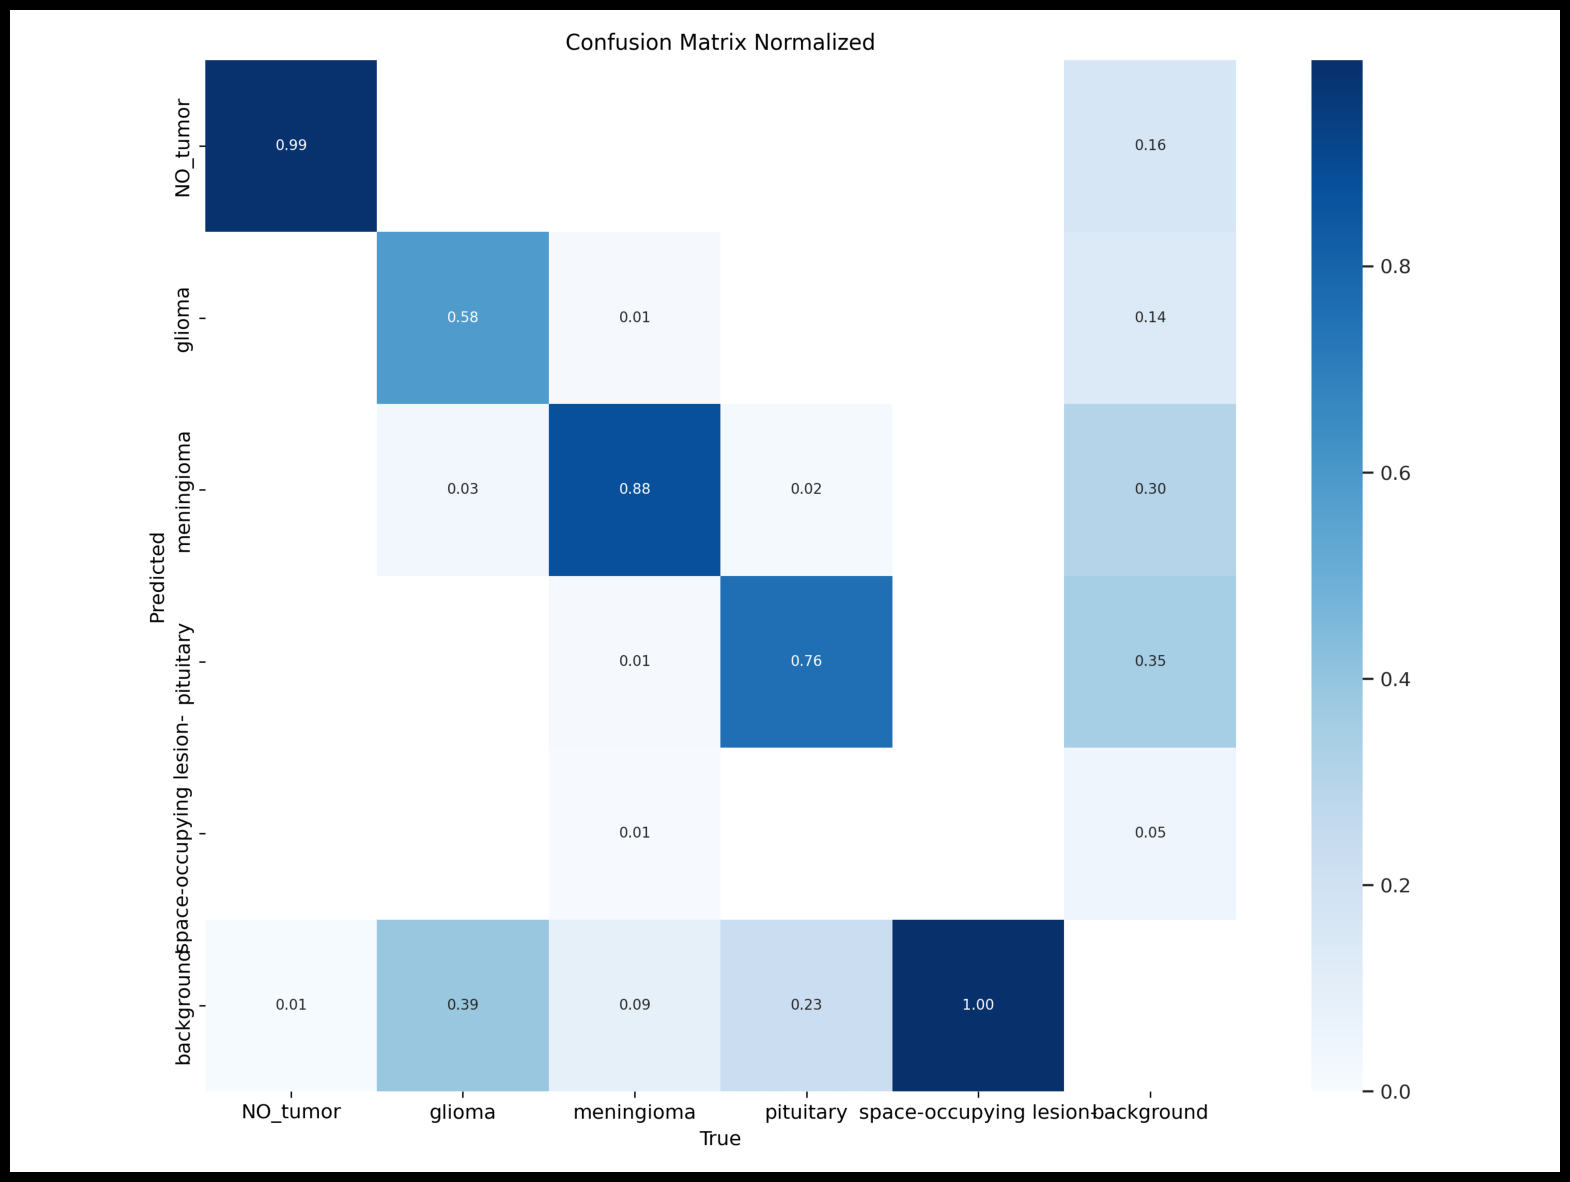

In [15]:
## Confusion Matrix Normalized
Show_Result(os.path.join(path,'confusion_matrix_normalized.png'))

<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Test Model</p></b></h1>

In [16]:
# Run inference on images in the 'test' folder
results = model.predict(source='/kaggle/working/Tumor-Detection-8/test/images', imgsz=640, conf=0.5,verbose=False)

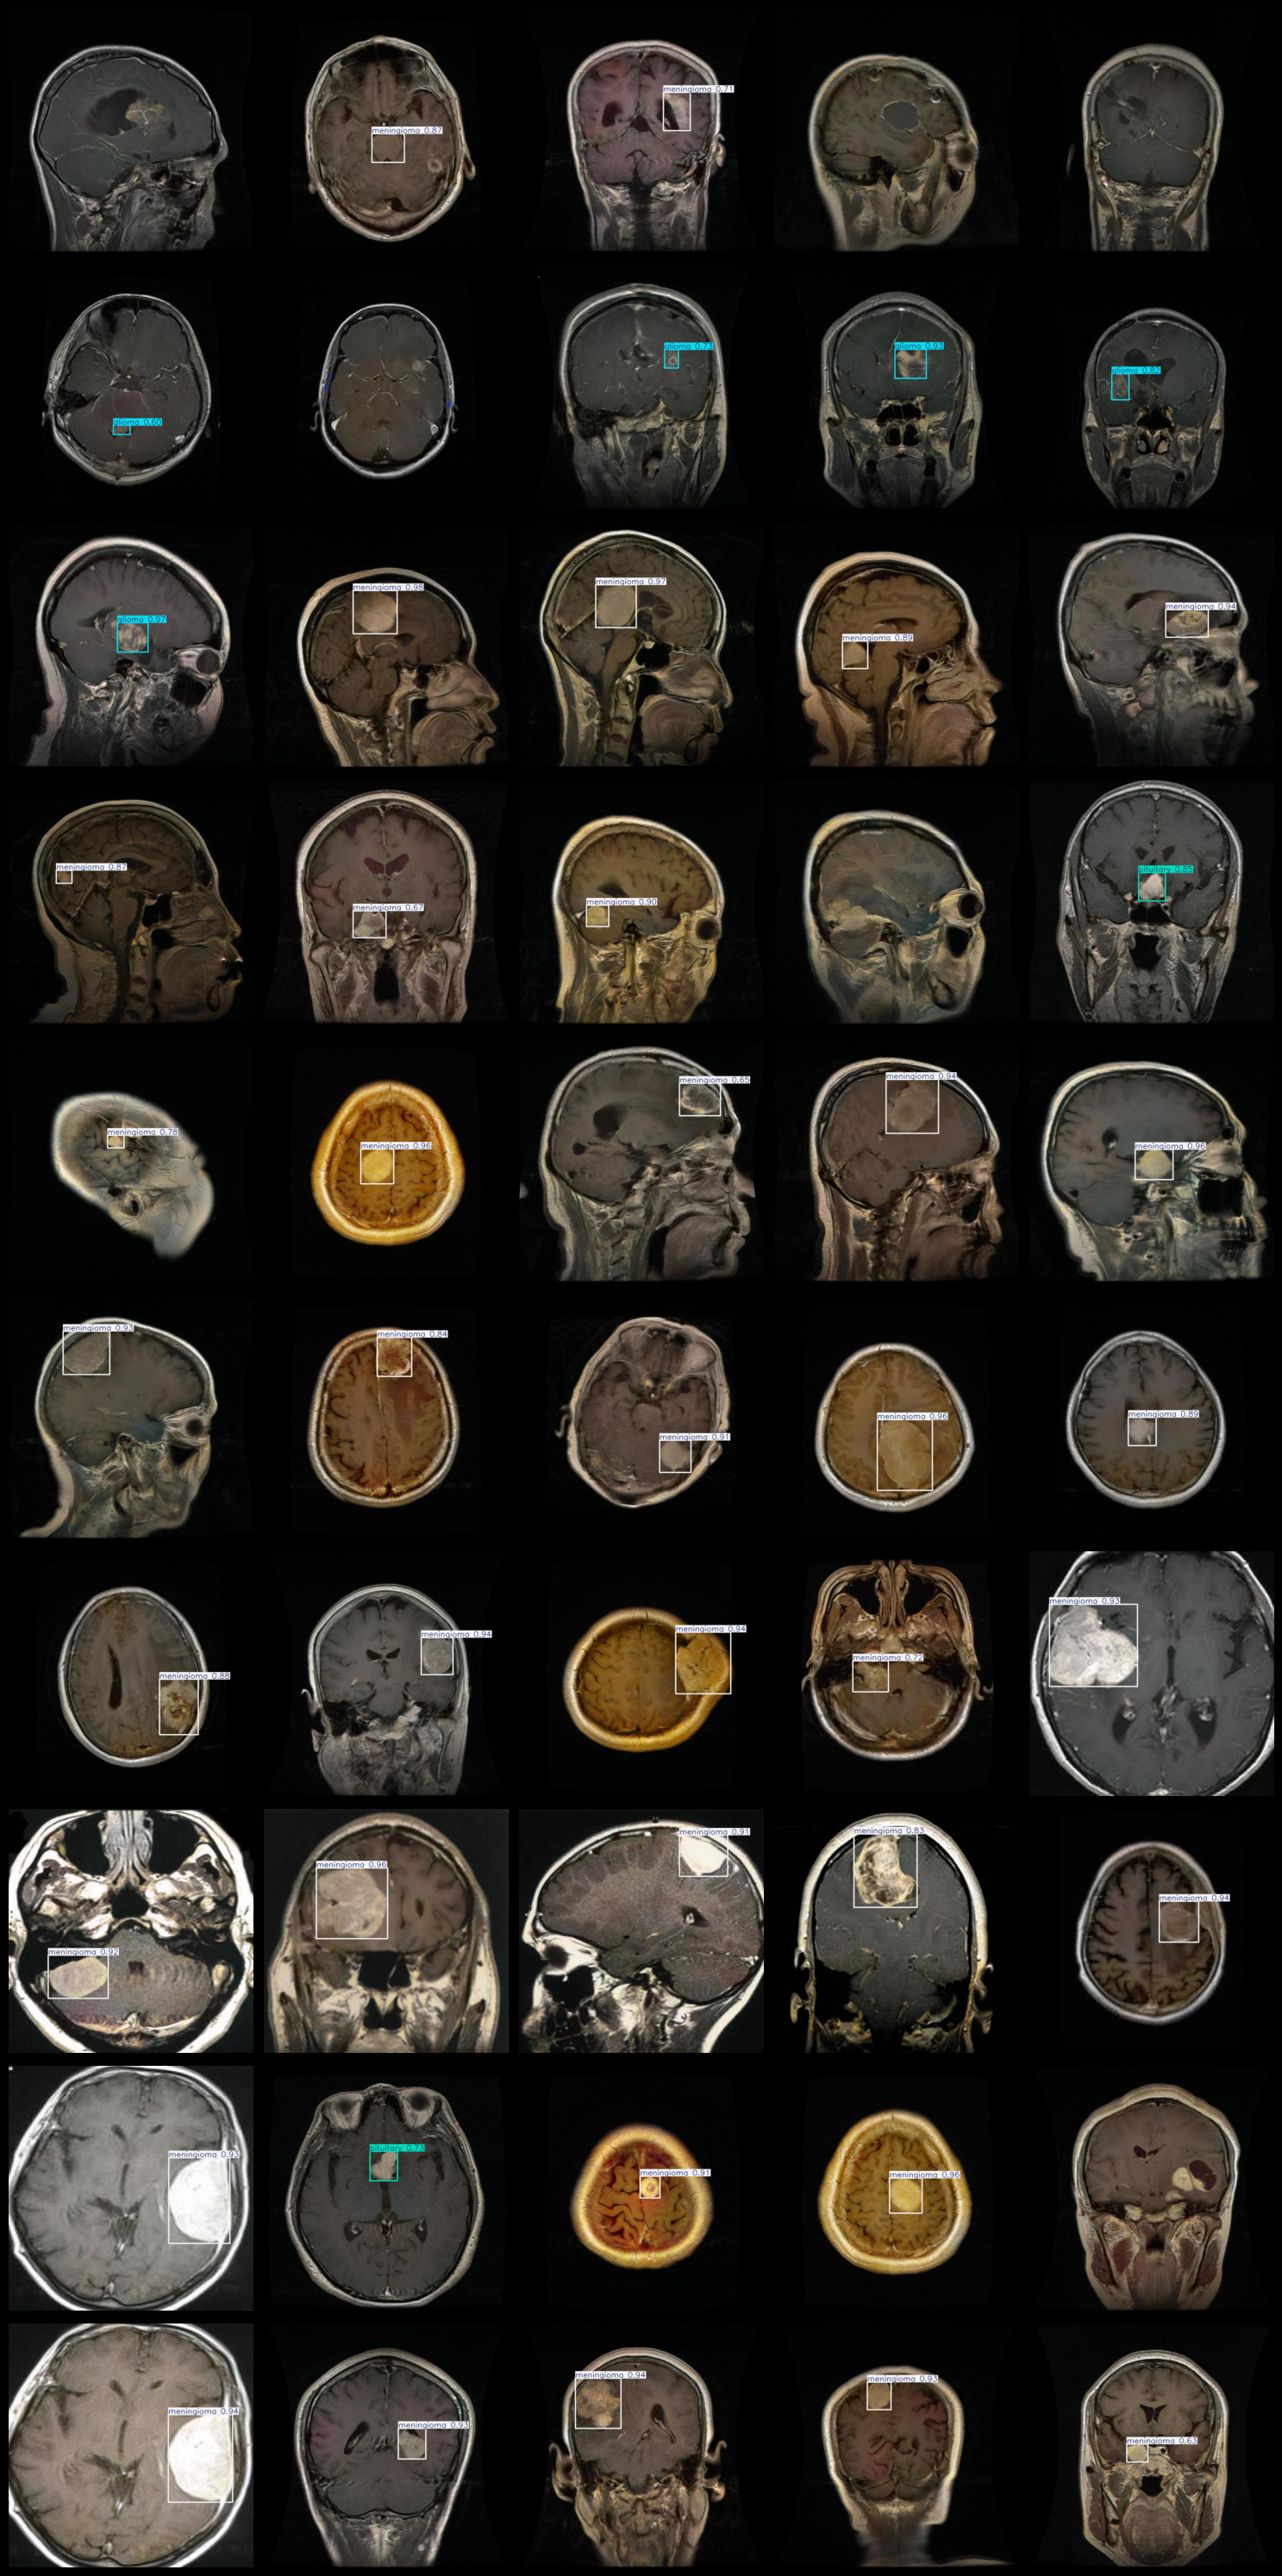

In [17]:
# Number of images to display
num_images = 50

# Set up the figure and grid
fig, axes = plt.subplots(10, 5, figsize=(15, 30))  # 10 rows and 5 columns

# Ensure there are enough images in the results
for i in range(min(num_images, len(results))):
    # Get the image with boxes drawn
    img_with_boxes = results[i].plot()  # This draws bounding boxes and labels on the image

    # Convert the image to RGB (matplotlib expects RGB, OpenCV uses BGR)
    img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    # Get the appropriate axis in the grid
    ax = axes[i // 5, i % 5]  # 5 columns
    ax.imshow(img_with_boxes)
    ax.axis('off')  # Hide the axes

# Adjust layout
plt.tight_layout()
plt.show()

<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>